In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [5]:


ball_positions = [x.get(1,[]) for x in ball_positions]
# convert list to dataframe to allow interpolate
df_ball_positions = pd.DataFrame(ball_positions, columns = ['x1', 'y1', 'x2', 'y2'])
# interpolate missing values
df_ball_positions = df_ball_positions.interpolate()
# ensure no missing values at start or end
df_ball_positions = df_ball_positions.bfill()

In [ ]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window = 5, min_periods = 1, center = False).mean()

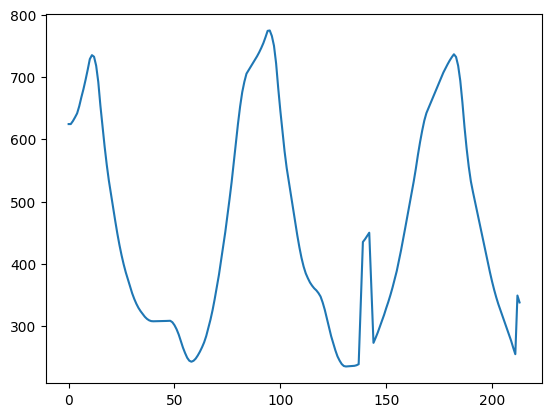

In [9]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

<Axes: >

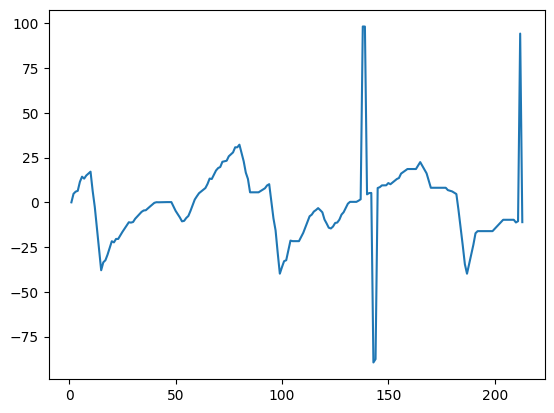

In [35]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
df_ball_positions['delta_y'].plot()

In [ ]:
ball_positions = [x.get(1,[]) for x in ball_positions]

df_ball_positions = pd.DataFrame(ball_positions, columns = ['x1', 'y1', 'x2', 'y2'])

df_ball_positions = df_ball_positions.interpolate()

df_ball_positions = df_ball_positions.bfill()

df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window = 5, min_periods = 1, center = False).mean()

df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

minimum_change_frames_for_hit = 25
df_ball_positions['ball_hit'] = 0  # initialize column

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    dy_current = df_ball_positions['delta_y'].iloc[i]
    dy_next = df_ball_positions['delta_y'].iloc[i + 1]

    negative_change = dy_current > 0 and dy_next < 0
    positive_change = dy_current < 0 and dy_next > 0

    if negative_change or positive_change:
        change_count = 0
        for offset in range(1, int(minimum_change_frames_for_hit * 1.2) + 1):
            dy_future = df_ball_positions['delta_y'].iloc[i + offset]

            if negative_change and dy_future < 0:
                change_count += 1
            elif positive_change and dy_future > 0:
                change_count += 1

        if change_count >= minimum_change_frames_for_hit - 1:
            df_ball_positions.at[i, 'ball_hit'] = 1
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [ ]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

[11, 58, 95, 131, 144, 182]